In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
tf.__version__

'2.4.1'

In [3]:
print('GPU Unformation -', tf.test.gpu_device_name(), '\n')
!nvidia-smi

GPU Unformation - /device:GPU:0 

Tue Mar 23 04:07:43 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.56       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    31W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

In [4]:
import keras
keras.__version__

'2.4.3'

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip'

-rw------- 1 root root 12929865 Mar  9 02:39 '/content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip'


In [9]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/Logo_Data.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip
  inflating: test/Adidas/4606245138.jpg  
 extracting: test/Adidas/Adidas_17.png  
 extracting: test/Adidas/Adidas_18.png  
 extracting: test/Adidas/Adidas_20.png  
 extracting: test/Adidas/Adidas_4.png  
 extracting: test/Adidas/Adidas_6.png  
 extracting: test/Adidas/Adidas_7.png  
  inflating: test/Apple/4748791597.jpg  
  inflating: test/Apple/Apple_10.jpg  
 extracting: test/Apple/Apple_12.png  
 extracting: test/Apple/Apple_14.png  
 extracting: test/Apple/Apple_16.png  
 extracting: test/Apple/Apple_18.png  
 extracting: test/Apple/Apple_20.png  
  inflating: test/BMW/3744679341.jpg  
  inflating: test/BMW/BMW_11.jpg     
  inflating: test/BMW/BMW_14.jpg     
  inflating: test/BMW/BMW_17.jpg     
  inflating: test/BMW/BMW_8.jpg      
  inflating: test/Citroen/2588612032.jpg  
  inflating: test/Citroen/Citroen_1.jpg  
  inflating: test/Citroen/Citroen_11.jpg  
 extracting: test/Citroen/Citroen_15.png  
 extr

In [10]:
!ls -l

total 16
drwx------  5 root root 4096 Mar 23 04:08 drive
drwxr-xr-x  1 root root 4096 Mar 18 13:36 sample_data
drwxr-xr-x 29 root root 4096 Mar 23 04:08 test
drwxr-xr-x 29 root root 4096 Mar 23 04:08 train


In [11]:
train_dir = 'train'
test_dir = 'test'

# batch_size = 다르게 15 | 11

In [46]:
from keras.preprocessing.image import ImageDataGenerator

# normal scaling
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), 
                                                    batch_size=15,
                                                    class_mode = 'categorical') 

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), 
                                                    batch_size=11,
                                                    class_mode='categorical')

Found 498 images belonging to 27 classes.
Found 177 images belonging to 27 classes.


In [27]:
for data_batch, labels_batch in train_generator: 
  print(f'배치 데이터 크기 : {data_batch.shape}')
  print(f'배치 데이터 크기 : {labels_batch.shape}')
  break # batch_size를 20장 했으니까 20장만 추출 / x = 150*150, y = class_mode: binary

배치 데이터 크기 : (15, 150, 150, 3)
배치 데이터 크기 : (15, 27)


In [48]:
from keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(27, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 128)      

In [34]:
177/11

16.09090909090909

In [49]:
%%time

Hist= model.fit(train_generator, # X= size(150*150) y=개 or 고양이 (binary)
                steps_per_epoch=33, # batch_size가 20개 X 100번 돌아야  = 총 2000장 추출가능
                epochs=60,
                validation_data=test_generator,
                validation_steps=16) # validation은 총 1000장이니까 20번씩 50번 돌면 1000장

Epoch 1/60
33/33 [==============================] - 2s 43ms/step - loss: 3.3329 - accuracy: 0.0215 - val_loss: 3.2474 - val_accuracy: 0.0625
Epoch 2/60
33/33 [==============================] - 1s 34ms/step - loss: 3.1572 - accuracy: 0.1211 - val_loss: 2.9240 - val_accuracy: 0.1420
Epoch 3/60
33/33 [==============================] - 1s 34ms/step - loss: 2.5628 - accuracy: 0.2854 - val_loss: 2.4999 - val_accuracy: 0.2727
Epoch 4/60
33/33 [==============================] - 1s 35ms/step - loss: 1.6006 - accuracy: 0.5604 - val_loss: 2.7698 - val_accuracy: 0.3523
Epoch 5/60
33/33 [==============================] - 1s 34ms/step - loss: 1.1812 - accuracy: 0.6487 - val_loss: 2.5436 - val_accuracy: 0.4261
Epoch 6/60
33/33 [==============================] - 1s 34ms/step - loss: 0.5636 - accuracy: 0.8535 - val_loss: 2.6299 - val_accuracy: 0.5000
Epoch 7/60
33/33 [==============================] - 1s 34ms/step - loss: 0.3853 - accuracy: 0.9022 - val_loss: 2.6825 - val_accuracy: 0.4943
Epoch 8/60
33

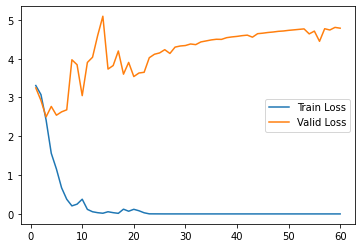

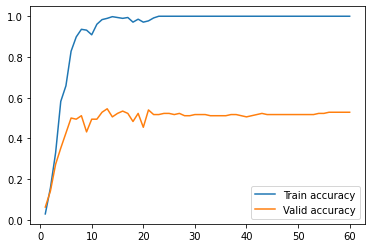

In [50]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss'])+1)

plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['Train Loss','Valid Loss'])
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.legend(['Train accuracy','Valid accuracy'])
plt.show()

In [51]:
loss, accuracy = model.evaluate(test_generator, steps=16)
loss, accuracy

16/16 [==============================] - 0s 17ms/step - loss: 4.7804 - accuracy: 0.5284


(4.7803568840026855, 0.5284090638160706)

# batch_size = 동일 11

In [40]:
print(498/11, 498%11)
print(177/11, 177%11)

45.27272727272727 3
16.09090909090909 1


In [52]:
from keras.preprocessing.image import ImageDataGenerator

# normal scaling
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), 
                                                    batch_size=11,
                                                    class_mode = 'categorical') 

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), 
                                                    batch_size=11,
                                                    class_mode='categorical')



model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(27, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



Hist1= model.fit(train_generator, # X= size(150*150) y=개 or 고양이 (binary)
                steps_per_epoch=45, # batch_size가 20개 X 100번 돌아야  = 총 2000장 추출가능
                epochs=60,
                validation_data=test_generator,
                validation_steps=16) # validation은 총 1000장이니까 20번씩 50번 돌면 1000장

Found 498 images belonging to 27 classes.
Found 177 images belonging to 27 classes.
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 17, 17, 128)       0         
____________________________________

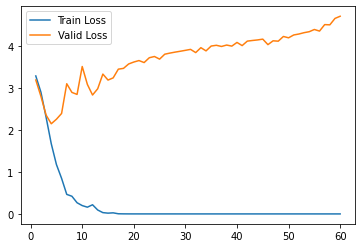

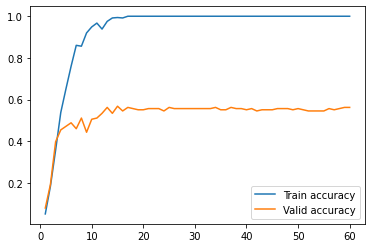

In [53]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist1.history['loss'])+1)

plt.plot(epochs, Hist1.history['loss'])
plt.plot(epochs, Hist1.history['val_loss'])
plt.legend(['Train Loss','Valid Loss'])
plt.show()

plt.plot(epochs, Hist1.history['accuracy'])
plt.plot(epochs, Hist1.history['val_accuracy'])
plt.legend(['Train accuracy','Valid accuracy'])
plt.show()

In [54]:
loss, accuracy = model.evaluate(test_generator, steps=16)
loss, accuracy

16/16 [==============================] - 0s 16ms/step - loss: 4.7032 - accuracy: 0.5625


(4.703218460083008, 0.5625)

# L2 + dropout

In [55]:
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

# normal scaling
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), 
                                                    batch_size=11,
                                                    class_mode = 'categorical') 

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), 
                                                    batch_size=11,
                                                    class_mode='categorical')



model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu',
                       kernel_regularizer = regularizers.l2(0.00001)))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(27, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



Hist1= model.fit(train_generator, # X= size(150*150) y=개 or 고양이 (binary)
                steps_per_epoch=45, # batch_size가 20개 X 100번 돌아야  = 총 2000장 추출가능
                epochs=60,
                validation_data=test_generator,
                validation_steps=16) # validation은 총 1000장이니까 20번씩 50번 돌면 1000장

Found 498 images belonging to 27 classes.
Found 177 images belonging to 27 classes.
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 17, 17, 128)       0         
____________________________________

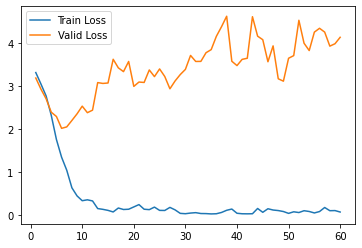

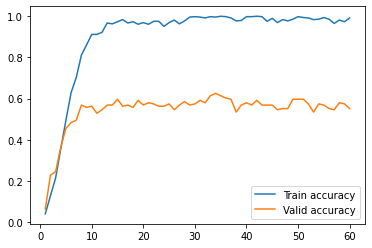

In [56]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist1.history['loss'])+1)

plt.plot(epochs, Hist1.history['loss'])
plt.plot(epochs, Hist1.history['val_loss'])
plt.legend(['Train Loss','Valid Loss'])
plt.show()

plt.plot(epochs, Hist1.history['accuracy'])
plt.plot(epochs, Hist1.history['val_accuracy'])
plt.legend(['Train accuracy','Valid accuracy'])
plt.show()

In [57]:
loss, accuracy = model.evaluate(test_generator, steps=16)
loss, accuracy

16/16 [==============================] - 0s 16ms/step - loss: 4.1276 - accuracy: 0.5511


(4.127552509307861, 0.5511363744735718)

# step 수를 올려서 사진을 전부 돌릴 수 있는지 확인

In [59]:
print(498/11)
print(177/11)

45.27272727272727
16.09090909090909


In [60]:
from keras.preprocessing.image import ImageDataGenerator

# normal scaling
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), 
                                                    batch_size=11,
                                                    class_mode = 'categorical') 

test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), 
                                                    batch_size=11,
                                                    class_mode='categorical')



model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(27, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



Hist1= model.fit(train_generator,
                steps_per_epoch=46,  # 사진 수량보다 더 높게
                epochs=60,
                validation_data=test_generator,
                validation_steps=17) 

Found 498 images belonging to 27 classes.
Found 177 images belonging to 27 classes.
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 17, 17, 128)       0         
____________________________________

In [61]:
loss, accuracy = model.evaluate(test_generator, steps=16)
loss, accuracy

16/16 [==============================] - 0s 16ms/step - loss: 4.9499 - accuracy: 0.5739


(4.9498796463012695, 0.5738636255264282)